# House Rent Prediction

### Table of Content
1. [Import Libraries](#Import_Libraries)
2. [Read Data](#Read_Data)
3. [Data Inspection](#Data_Inspection)
4. [Data Pre-processing](#Data_Pre-processing)
5. [Missing Values](#Missing_Values)
6. [Outliers](#Outliers)
7. [Visualization](#Visualization)
8. [Label Encoding](#Label_Encoding)
9. [Model Building](#Model_Building)
    * [Linear Regression](#Linear_Regression)
    * [Decision Tree](#Decision_Tree)
    * [Random Forest](#Random_Forest)
    * [Extra Tree Regressor](#Extra_Tree_Regressor)
    * [Gradient Boost](#Gradient_Boost)
    * [XG Boost](#XG_Boost)
    * [Ada Boost](#Ada_Boost)
    
10. [Model Performance Comparison](#Comparison)
11. [Voting Classifier](#Voting)
12. [Model Dump](#Dump)





# Import Libraries
<a class="anchor" id="Import_Libraries"></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read Data
<a class="anchor" id="Read_Data"></a>

In [2]:
df = pd.read_csv('Mumbai_House_Rent.csv')

# Data Inspection
<a class="anchor" id="Data_Inspection"></a>

In [3]:
df.head()

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking,Carpet_area(sq.ft)
0,Andheri,1 RK Apartment,20000,350 sq.ft,Semi Furnished,1,Missing,0.0,250 sq.ft
1,Andheri,3 BHK Apartment,100000,1850 sq.ft,Semi Furnished,3,1,2.0,1400 sq.ft
2,Andheri,2 BHK Apartment,45000,1240 sq.ft,Semi Furnished,2,4,1.0,850 sq.ft
3,Andheri,1 BHK Apartment,31500,650 sq.ft,Unfurnished,2,Missing,1.0,425 sq.ft
4,Andheri,2 BHK Apartment,44000,1250 sq.ft,Unfurnished,2,3,1.0,800 sq.ft


In [4]:
df.shape

(15386, 9)

In [5]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)     object
Furnishing               object
Bathrooms                object
Balcony                  object
Parking                 float64
Carpet_area(sq.ft)       object
dtype: object

Bathroom Column

In [6]:
df.Bathrooms.unique()

array(['1', '3', '2', 'Missing', '4', '5', '6', '7'], dtype=object)

In [7]:
df.Bathrooms.replace('Missing',np.nan,inplace=True)

Balcony Column

In [8]:
df.Balcony.unique()

array(['Missing', '1', '4', '3', '2', '5', '6'], dtype=object)

In [9]:
df.Balcony.replace('Missing',np.nan,inplace=True)

Build_up_area column

In [10]:
df['Build_up_area(sq.ft)']=df['Build_up_area(sq.ft)'].str.split().str[0]

In [11]:
df['Build_up_area(sq.ft)'] = df['Build_up_area(sq.ft)'].astype('int')

In [12]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)      int32
Furnishing               object
Bathrooms                object
Balcony                  object
Parking                 float64
Carpet_area(sq.ft)       object
dtype: object

Carpet Area

In [13]:
df['Carpet_area(sq.ft)'].replace('Missing',0,inplace=True)

In [14]:
df['Carpet_area(sq.ft)']=df['Carpet_area(sq.ft)'].str.split().str[0]

In [15]:
def to_num(s):
    if type(s)==str:
        return int(s)
    else:
        return s

In [16]:
df['Carpet_area(sq.ft)'] = df['Carpet_area(sq.ft)'].apply(to_num)

<AxesSubplot:>

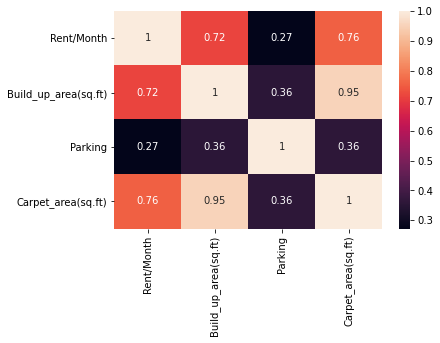

In [17]:
sns.heatmap(df.corr(),annot=True)

Build_up_area and Carpet area are strongly correlated with each other so dropping Carpet area column

In [18]:
df.drop('Carpet_area(sq.ft)',axis=1,inplace=True)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rent/Month,15386.0,54306.799363,43373.356708,3500.0,30000.0,43000.0,65000.0,1000000.0
Build_up_area(sq.ft),15386.0,909.017873,439.382630,110.0,600.0,850.0,1150.0,5200.0
Parking,15351.0,0.971272,0.672316,0.0,1.0,1.0,1.0,4.0


# EDA

# Checking Missing Values
<a class="anchor" id="Missing_Values"></a>

In [20]:
df.isna().sum()

Locality                   0
Type                       0
Rent/Month                 0
Build_up_area(sq.ft)       0
Furnishing                 0
Bathrooms                404
Balcony                 9272
Parking                   35
dtype: int64

Handling missing values

Parking Column

In [21]:
df.Parking.mode()[0]

1.0

In [22]:
df.Parking.fillna(df.Parking.mode()[0],inplace=True)

Bathroom Column

1 RK Apartment

In [23]:
df[df.Type=='1 RK Apartment']['Bathrooms'].mode()[0]

'1'

In [24]:
i = df[(df.Type=='1 RK Apartment')&(df.Bathrooms.isna())].index

In [25]:
i

Int64Index([ 2522,  2647,  3752,  3892,  4151,  4163,  4219,  4680,  4692,
             4696,
            ...
            13752, 13792, 13800, 13851, 14319, 14325, 14344, 14402, 14407,
            15141],
           dtype='int64', length=108)

In [26]:
df.loc[i,'Bathrooms'] = 1

1 BHK Apartment

In [27]:
df[df.Type=='1 BHK Apartment']['Bathrooms'].mode()[0]

'1'

In [28]:
i = df[(df.Type=='1 BHK Apartment')&(df.Bathrooms.isna())].index
i

Int64Index([  191,   465,   603,  1118,  1329,  1756,  2199,  2332,  2334,
             2335,
            ...
            14326, 14356, 14357, 15125, 15128, 15163, 15164, 15181, 15202,
            15218],
           dtype='int64', length=159)

In [29]:
df.loc[i,'Bathrooms'] = 1

2 BHK Apartment

In [30]:
df[df.Type=='2 BHK Apartment']['Bathrooms'].mode()

0    2
dtype: object

In [31]:
i = df[(df.Type=='2 BHK Apartment')&(df.Bathrooms.isna())].index
i

Int64Index([  343,   355,   742,  1595,  1624,  2051,  2180,  2234,  2242,
             2271,
            ...
            14032, 14199, 14339, 14355, 14512, 14513, 14543, 15127, 15183,
            15232],
           dtype='int64', length=103)

In [32]:
df.loc[i,'Bathrooms'] = 2

3 BHK Apartment

In [33]:
df[df.Type=='3 BHK Apartment']['Bathrooms'].mode()

0    3
dtype: object

In [34]:
i = df[(df.Type=='3 BHK Apartment')&(df.Bathrooms.isna())].index
i

Int64Index([   33,   474,  1003,  1780,  2381,  2431,  4669,  4831,  6183,
             7204,  7206,  8737,  8765,  8869,  8873,  9826, 10186, 10483,
            10489, 10760, 10761, 11093, 11858, 11872, 13242, 13243, 13516,
            13523, 13909, 13949, 14335, 14383, 14399, 14690],
           dtype='int64')

In [35]:
df.loc[i,'Bathrooms']=3

Handling missing values of Balcony column 

In [36]:
df.Balcony.mode()[0]

'1'

In [37]:
df.Balcony.fillna(df.Balcony.mode()[0],inplace=True)

In [38]:
df.isna().sum()

Locality                0
Type                    0
Rent/Month              0
Build_up_area(sq.ft)    0
Furnishing              0
Bathrooms               0
Balcony                 0
Parking                 0
dtype: int64

In [39]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)      int32
Furnishing               object
Bathrooms                object
Balcony                  object
Parking                 float64
dtype: object

In [40]:
df.Balcony = df.Balcony.astype('int')
df.Bathrooms = df.Bathrooms.astype('int')

# Checking Outliers
<a class="anchor" id="Outliers"></a>

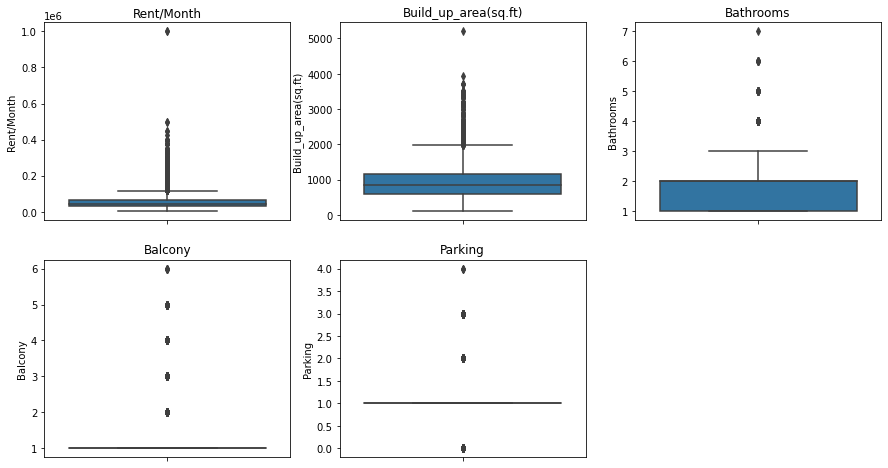

In [41]:
i=1
plt.figure(figsize=(15,8))
for x in df.columns:
    if df[x].dtypes != 'O':
        plt.subplot(2,3,i)
        plt.title(x)
        sns.boxplot(y=df[x])
        i+=1

In [42]:
# funnction to return index for column that have data points greater than given limit
def outs(df,col,limit):
    index = []
    index = df[df[col]>limit].index

    return index

ind = outs(df,'Rent/Month',400000)
ind

Int64Index([1430, 4680, 9163, 10610, 10616, 12121, 13296], dtype='int64')

Handling Outliers of Rent per month column

In [43]:
df[df['Rent/Month']>400000]

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking
1430,Bandra,3 BHK Apartment,500000,1500,Fully Furnished,3,3,1.0
4680,Ghatkopar,1 RK Apartment,1000000,225,Semi Furnished,1,1,2.0
9163,Malabar Hill,3 BHK Apartment,450000,2250,Fully Furnished,4,1,0.0
10610,Nariman Point,3 BHK Apartment,425000,2880,Fully Furnished,3,1,2.0
10616,Nariman Point,3 BHK Apartment,450000,2880,Fully Furnished,4,1,0.0
12121,Prabhadevi,3 BHK Apartment,500000,2200,Fully Furnished,3,1,2.0
13296,Vidyavihar,1 RK Apartment,1000000,225,Semi Furnished,1,1,2.0


In [44]:
ind

Int64Index([1430, 4680, 9163, 10610, 10616, 12121, 13296], dtype='int64')

Finding rent wrt locality,type,build_up_area

In [45]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)      int32
Furnishing               object
Bathrooms                 int32
Balcony                   int32
Parking                 float64
dtype: object

In [46]:
df[(df.Locality=='Bandra')&(df.Type=='3 BHK Apartment')&(df['Build_up_area(sq.ft)']==1500)&(df['Balcony']<4)]['Rent/Month'].sort_values(ascending=False).head(2)

1430    500000
1448    260000
Name: Rent/Month, dtype: int64

In [47]:
# Replacing value of outlier
df.loc[1430,'Rent/Month'] = 260000

In [48]:
df[(df.Locality=='Prabhadevi')&(df.Type=='3 BHK Apartment')&(df['Build_up_area(sq.ft)']==2200)&(df['Balcony']<4)]['Rent/Month'].sort_values(ascending=False).head(2)

12121    500000
12136    380000
Name: Rent/Month, dtype: int64

In [49]:
# Replacing value of outlier
df.loc[12121,'Rent/Month'] = 380000

In [50]:
value = df[(df.Locality=='Ghatkopar')&(df.Type=='1 RK Apartment')&(df['Build_up_area(sq.ft)']==225)]['Rent/Month'].median()
value

13000.0

In [51]:
# Replacing value of outlier
df.loc[4680,'Rent/Month'] = int(value)

In [52]:
value1 = df[(df.Locality=='Vidyavihar')&(df.Type=='1 RK Apartment')&(df['Build_up_area(sq.ft)']<300)]['Rent/Month'].median()
value1

14000.0

In [53]:
# Replacing value of outlier
df.loc[13296,'Rent/Month'] = int(value1)

In [54]:
df[(df.Locality=='Nariman Point')&(df.Type=='3 BHK Apartment')&(df['Build_up_area(sq.ft)']<=2880)&(df['Balcony']<5)]['Rent/Month'].sort_values(ascending=False).head(3)

10616    450000
10610    425000
10615    270000
Name: Rent/Month, dtype: int64

In [55]:
df.loc[[9163, 10610, 10616],'Rent/Month'] = 270000

Build_up_area(sq.ft) column

In [56]:
df[df['Build_up_area(sq.ft)']>4000]

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking
14721,Worli,3 BHK Apartment,300000,5200,Semi Furnished,4,4,2.0


In [57]:
value2 = df[df['Build_up_area(sq.ft)']>3500]['Build_up_area(sq.ft)'].median()
value2

3700.0

In [58]:
# Replacing value of outlier
df.loc[14721,'Build_up_area(sq.ft)'] = int(value2)

# Visualization
<a class="anchor" id="Visualization"></a>

Total Apartment for rent of each Type

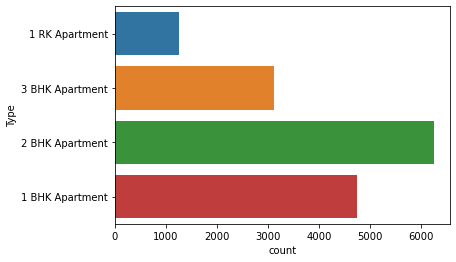

In [59]:
sns.countplot(y=df.Type)
plt.show()

Average Rent per month for each Type of Apartment

In [60]:
df.groupby('Type')['Rent/Month'].mean().sort_values(ascending=False)

Type
3 BHK Apartment    101556.444444
2 BHK Apartment     54774.726604
1 BHK Apartment     31502.143037
1 RK Apartment      18599.073927
Name: Rent/Month, dtype: float64

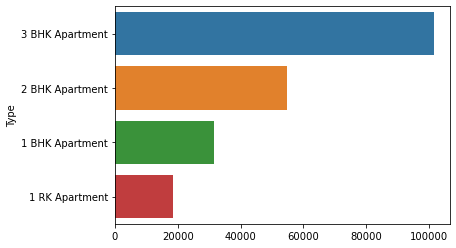

In [61]:
sns.barplot(y=df.groupby('Type')['Rent/Month'].mean().sort_values(ascending=False).index,x=df.groupby('Type')['Rent/Month'].mean().sort_values(ascending=False).values)
plt.show()

Average Rent per month for every Locality

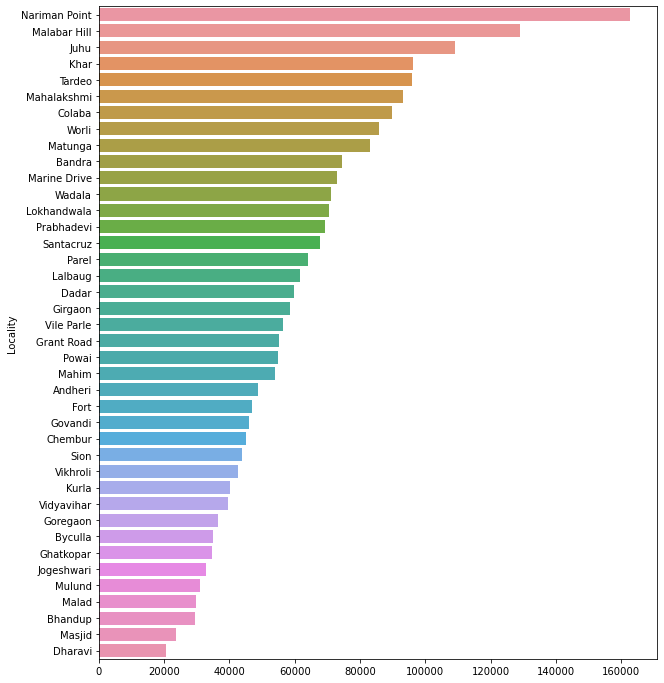

In [62]:
plt.figure(figsize=(10,12))
sns.barplot(y=df.groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).index,x=df.groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).values)
plt.show()

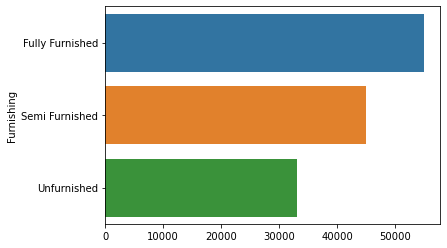

In [63]:
sns.barplot(y=df.groupby('Furnishing')['Rent/Month'].median().sort_values(ascending=False).index,x=df.groupby('Furnishing')['Rent/Month'].median().sort_values(ascending=False).values)
plt.show()

# Top High-priced Localities

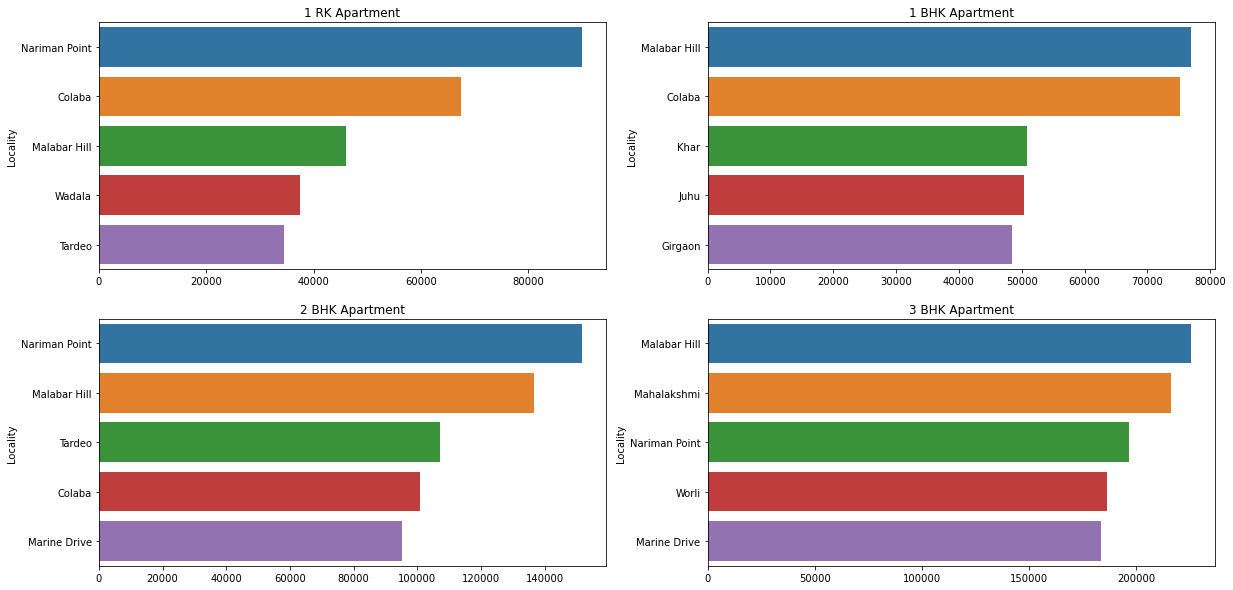

In [64]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(y=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('1 RK Apartment')

plt.subplot(2,2,2)
sns.barplot(y=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('1 BHK Apartment')

plt.subplot(2,2,3)
sns.barplot(y=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('2 BHK Apartment')

plt.subplot(2,2,4)
sns.barplot(y=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('3 BHK Apartment')
plt.show()

# Top Low-priced Localities

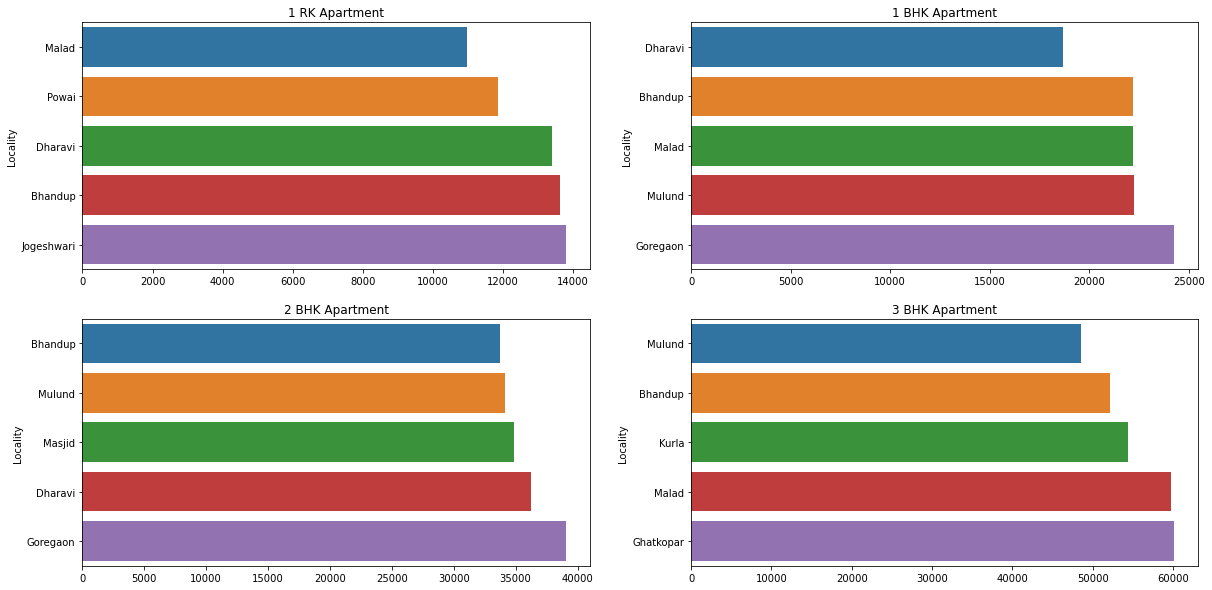

In [65]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(y=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('1 RK Apartment')

plt.subplot(2,2,2)
sns.barplot(y=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('1 BHK Apartment')

plt.subplot(2,2,3)
sns.barplot(y=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('2 BHK Apartment')

plt.subplot(2,2,4)
sns.barplot(y=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('3 BHK Apartment')
plt.show()

# Rent as per balconies

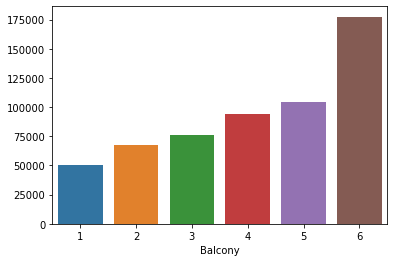

In [66]:
sns.barplot(x=df.groupby('Balcony')['Rent/Month'].mean().sort_values(ascending=True).index,y=df.groupby('Balcony')['Rent/Month'].mean().sort_values(ascending=True).values)
plt.show()

# Rent as per Parking

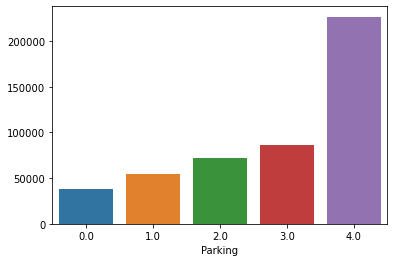

In [67]:
sns.barplot(x=df.groupby('Parking')['Rent/Month'].mean().sort_values(ascending=True).index,y=df.groupby('Parking')['Rent/Month'].mean().sort_values(ascending=True).values)
plt.show()

# Rent as per Area

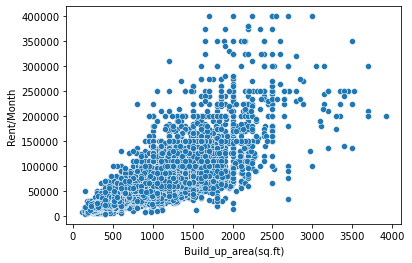

In [68]:
sns.scatterplot(x=df['Build_up_area(sq.ft)'],y=df['Rent/Month'])
plt.show()

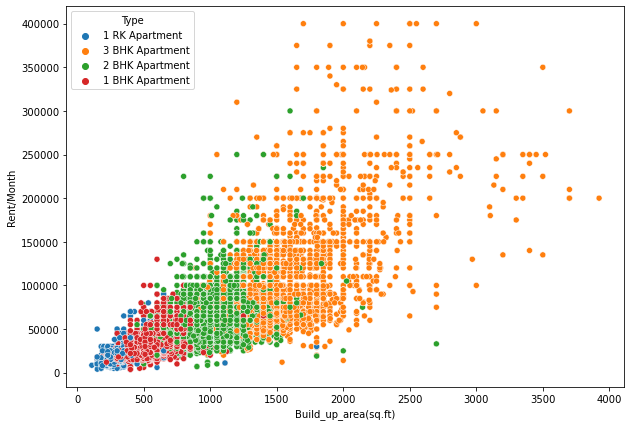

In [69]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Build_up_area(sq.ft)'],y=df['Rent/Month'],hue=df.Type)
plt.show()

In [70]:
newdf = df.copy()

In [71]:
newdf

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking
0,Andheri,1 RK Apartment,20000,350,Semi Furnished,1,1,0.0
1,Andheri,3 BHK Apartment,100000,1850,Semi Furnished,3,1,2.0
2,Andheri,2 BHK Apartment,45000,1240,Semi Furnished,2,4,1.0
3,Andheri,1 BHK Apartment,31500,650,Unfurnished,2,1,1.0
4,Andheri,2 BHK Apartment,44000,1250,Unfurnished,2,3,1.0
...,...,...,...,...,...,...,...,...
15381,Worli,1 RK Apartment,25000,300,Fully Furnished,1,1,0.0
15382,Worli,3 BHK Apartment,215000,3132,Semi Furnished,3,2,3.0
15383,Worli,2 BHK Apartment,100000,1180,Fully Furnished,2,3,1.0
15384,Worli,3 BHK Apartment,240000,3400,Semi Furnished,4,2,2.0


In [72]:
# csv for visualization
newdf.to_csv('Visualize.csv',index=False)

# Label Encoding
<a class="anchor" id="Label_Encoding"></a>

In [73]:
df.Furnishing=df.Furnishing.map({'Unfurnished':0,'Semi Furnished':1,'Fully Furnished':2})

In [74]:
df.Type = df.Type.map({'1 RK Apartment':0,'1 BHK Apartment':1,'2 BHK Apartment':2,'3 BHK Apartment':3})

In [75]:
a = dict(zip(list(df.Locality.unique()),list(range(40))))

In [76]:
print(a)

{'Andheri': 0, 'Bandra': 1, 'Bhandup': 2, 'Byculla': 3, 'Chembur': 4, 'Colaba': 5, 'Dadar': 6, 'Dharavi': 7, 'Fort': 8, 'Ghatkopar': 9, 'Girgaon': 10, 'Goregaon': 11, 'Govandi': 12, 'Grant Road': 13, 'Jogeshwari': 14, 'Juhu': 15, 'Khar': 16, 'Kurla': 17, 'Lalbaug': 18, 'Lokhandwala': 19, 'Mahalakshmi': 20, 'Mahim': 21, 'Malabar Hill': 22, 'Malad': 23, 'Marine Drive': 24, 'Masjid': 25, 'Matunga': 26, 'Mulund': 27, 'Nariman Point': 28, 'Parel': 29, 'Powai': 30, 'Prabhadevi': 31, 'Santacruz': 32, 'Sion': 33, 'Tardeo': 34, 'Vidyavihar': 35, 'Vikhroli': 36, 'Vile Parle': 37, 'Wadala': 38, 'Worli': 39}


In [77]:
df.Locality=df.Locality.map(a)

In [78]:
df.Parking=df.Parking.astype('int')

In [79]:
df.dtypes

Locality                int64
Type                    int64
Rent/Month              int64
Build_up_area(sq.ft)    int32
Furnishing              int64
Bathrooms               int32
Balcony                 int32
Parking                 int32
dtype: object

# Model Building
<a class="anchor" id="Model_Building"></a>

In [80]:
X = df.copy()

In [81]:
X.drop('Rent/Month',axis=1,inplace=True)

In [82]:
X

,Locality,Type,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking
0,0,0,350,1,1,1,0
1,0,3,1850,1,3,1,2
2,0,2,1240,1,2,4,1
3,0,1,650,0,2,1,1
4,0,2,1250,0,2,3,1
...,...,...,...,...,...,...,...
15381,39,0,300,2,1,1,0
15382,39,3,3132,1,3,2,3
15383,39,2,1180,2,2,3,1
15384,39,3,3400,1,4,2,2


In [83]:
Y = df['Rent/Month']

In [84]:
Y

0         20000
1        100000
2         45000
3         31500
4         44000
          ...  
15381     25000
15382    215000
15383    100000
15384    240000
15385    250000
Name: Rent/Month, Length: 15386, dtype: int64

# Split Data

In [85]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# Linear Regression
<a class="anchor" id="Linear_Regression"></a>

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [87]:
# Evaluation
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

lracc = r2_score(Y_test,Y_pred)
print('Score ->',lracc)

lrrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',lrrmse)

Score -> 0.5617102229726565
RMSE -> 26906.158717114595


# Decision Tree
<a class="anchor" id="Decision_Tree"></a>

In [88]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

#fit the model on the data and predict the values
dt.fit(X_train,Y_train)

Y_pred=dt.predict(X_test)

In [89]:

dtacc = r2_score(Y_test,Y_pred)
print('Score ->',dtacc)

dtrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',dtrmse)

Score -> 0.5603893623367406
RMSE -> 26946.671355245777


# Random Forest
<a class="anchor" id="Random_Forest"></a>

In [90]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=101,min_samples_split=15,max_features='auto',min_samples_leaf=2,
                                        criterion='mae')

#fit the model on the data and predict the values
rf.fit(X_train,Y_train)

Y_pred=rf.predict(X_test)


In [91]:
rfacc = r2_score(Y_test,Y_pred)
print('Score ->',rfacc)

rfrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',rfrmse)

Score -> 0.7410127955431292
RMSE -> 20682.840515912332


# Extra Tree
<a class="anchor" id="Extra_Tree_Regressor"></a>

In [92]:
from sklearn.ensemble import ExtraTreesRegressor

et=ExtraTreesRegressor(n_estimators=100,min_samples_split=3,min_samples_leaf=1,max_features='log2',
                                      criterion='mae')

#fit the model on the data and predict the values
et.fit(X_train,Y_train)

Y_pred=et.predict(X_test)

etacc = r2_score(Y_test,Y_pred)
print('Score ->',etacc)

etrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',etrmse)

Score -> 0.718690070632451
RMSE -> 21555.770945592445


# Gradient Boost
<a class="anchor" id="Gradient_Boost"></a>

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=2,
                                            max_features='auto',loss='ls',learning_rate=0.5,criterion='mae')
#fit the model on the data and predict the values
gb.fit(X_train,Y_train)

Y_pred=gb.predict(X_test)

gbacc = r2_score(Y_test,Y_pred)
print('Score ->',gbacc)

gbrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',gbrmse)

Score -> 0.7572307943973491
RMSE -> 20024.78342991656


# XGB
<a class="anchor" id="XG_Boost"></a>

In [94]:
from xgboost import XGBRegressor

xg=XGBRegressor(n_estimators=100,learning_rate=0.1)

#fit the model on the data and predict the values
xg.fit(X_train,Y_train)

Y_pred=xg.predict(X_test)

xgacc = r2_score(Y_test,Y_pred)
print('Score ->',xgacc)

xgrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',xgrmse)

Score -> 0.7624026187735145
RMSE -> 19810.336566975482


# ADA boost
<a class="anchor" id="Ada_Boost"></a>

In [95]:
from sklearn.ensemble import AdaBoostRegressor

ab=AdaBoostRegressor(base_estimator=XGBRegressor(n_estimators=100,learning_rate=0.1),n_estimators=50,
                                    loss='linear',learning_rate=0.1)

#fit the model on the data and predict the values
ab.fit(X_train,Y_train)

Y_pred=ab.predict(X_test)

abacc = r2_score(Y_test,Y_pred)
print('Score ->',abacc)

abrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',abrmse)

Score -> 0.7538489942193086
RMSE -> 20163.774716794756


# Comparision of Models
<a class="anchor" id="Comparison"></a>


In [96]:
performance_df = pd.DataFrame([[lracc,dtacc,etacc,rfacc,gbacc,xgacc,abacc],[lrrmse,dtrmse,etrmse,rfrmse,gbrmse,xgrmse,abrmse]]).T

In [97]:
performance_df.columns = ['Accuracy','RMSE']
performance_df.index = ['Logistic Regression','Decision Tree','Extra Tree','Random Forest','Gradient Boost','XG Boost','ADA Boost']

In [98]:
performance_df

,Accuracy,RMSE
Logistic Regression,0.561710,26906.158717
Decision Tree,0.560389,26946.671355
Extra Tree,0.718690,21555.770946
Random Forest,0.741013,20682.840516
Gradient Boost,0.757231,20024.783430
XG Boost,0.762403,19810.336567
ADA Boost,0.753849,20163.774717


In [99]:
performance_df.sort_values(by='RMSE')

,Accuracy,RMSE
XG Boost,0.762403,19810.336567
Gradient Boost,0.757231,20024.783430
ADA Boost,0.753849,20163.774717
Random Forest,0.741013,20682.840516
Extra Tree,0.718690,21555.770946
Logistic Regression,0.561710,26906.158717
Decision Tree,0.560389,26946.671355


In [100]:
performance_df.Accuracy.sort_values(ascending=False)

XG Boost               0.762403
Gradient Boost         0.757231
ADA Boost              0.753849
Random Forest          0.741013
Extra Tree             0.718690
Logistic Regression    0.561710
Decision Tree          0.560389
Name: Accuracy, dtype: float64

Text(0.5, 1.0, 'RMSE')

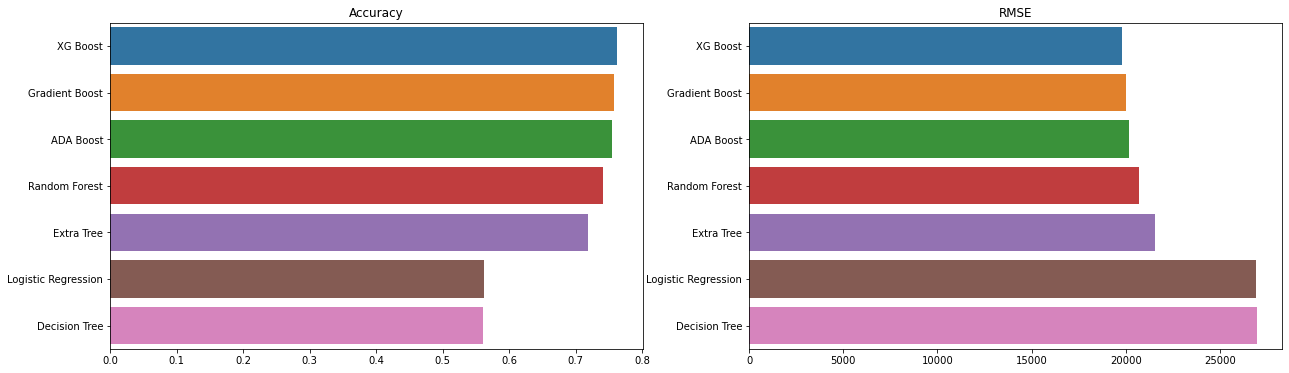

In [101]:
plt.figure(figsize=(21,6))
plt.subplot(1,2,1)
sns.barplot(x=performance_df.Accuracy.sort_values(ascending=False).values,y=performance_df.Accuracy.sort_values(ascending=False).index)
plt.title('Accuracy')
plt.subplot(1,2,2)
sns.barplot(x=performance_df.RMSE.sort_values(ascending=True).values,y=performance_df.RMSE.sort_values(ascending=True).index)
plt.title('RMSE')

# Voting Classifier
<a class="anchor" id="Voting"></a>

In [103]:
from sklearn.ensemble import VotingRegressor

model_list = [('gb',gb),('ab',ab),('xgb',xg)]
# create the sub models
estimators = model_list

# create the ensemble model
ensemble = VotingRegressor(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)

In [104]:
vcacc = r2_score(Y_test,Y_pred)
print('Score ->',vcacc)

vcrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',vcrmse)

Score -> 0.7694563179707069
RMSE -> 19514.060259133083


(0.0, 310000.0)

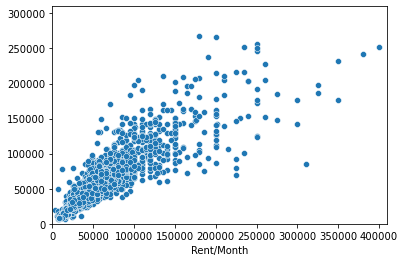

In [105]:
sns.scatterplot(x=Y_test,y=Y_pred)
plt.xlim(0,410000)
plt.ylim(0,310000)

<AxesSubplot:xlabel='Rent/Month', ylabel='Density'>

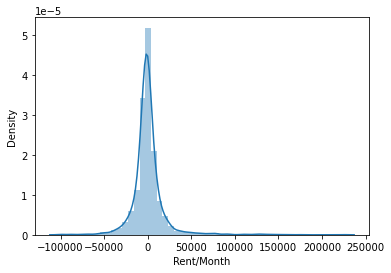

In [106]:
sns.distplot(Y_test-Y_pred)

# Dump Model
<a class="anchor" id="Dump"></a>

In [ ]:
import pickle
pickle.dump(ensemble,open('FinalModel.pkl','wb'))
print('Done')